In [3]:
!pip install qiskit

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#switch case
from qiskit import QuantumRegister, ClassicalRegister

qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)
qc.h ([0, 1])
qc.measure([0, 1],[0, 1])

with qc.switch(creg) as case:
    with case(0):
        qc.z(0)
    with case(1, 2):
        qc.cs(0, 1)
    with case(case.DEFAULT):
        qc.h(0)

qc.draw()

┌───┐┌─┐   ┌────────── ┌──────────── ┌───┐┌───────────────      »
q1_0: ┤ H ├┤M├───┤           ┤             ┤ Z ├┤                ──■──»
      ├───┤└╥┘┌─┐│ Switch-0  │ Case-0 (0)  └───┘│ Case-0 (1, 2)  ┌─┴─┐»
q1_1: ┤ H ├─╫─┤M├┤           ┤             ─────┤                ┤ S ├»
      └───┘ ║ └╥┘└────╥───── └────────────      └─────────────── └───┘»
            ║  ║   ┌──╨──┐                                            »
c1: 2/══════╩══╩═══╡ 0x3 ╞════════════════════════════════════════════»
            0  1   └─────┘                                            »
«      ┌──────────────── ┌───┐ ───────┐ 
«q1_0: ┤                 ┤ H ├        ├─
«      │ Case-0 default  └───┘  End-0 │ 
«q1_1: ┤                 ─────        ├─
«      └────────────────       ───────┘ 
«c1: 2/═════════════════════════════════
«

In [29]:
!pip install matplotlib pylatexenc

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from qiskit import QuantumCircuit
from IPython.display import display

qc = QuantumCircuit(1, 1)
qc.measure(0, 0)
print(qc.draw('text'))





     ┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0 


In [4]:
import qiskit 
print(qiskit.__version__)

2.3.0


In [8]:
from qiskit_aer import Aer
from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')

compiled = transpile(qc, backend)

job= backend.run(compiled, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

ModuleNotFoundError: No module named 'qiskit_aer'

In [9]:
import sys
!{sys.executable} -m pip install qiskit-aer


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 2.0 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.6 MB 1.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.6 MB 1.8 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.6 MB 1.4 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.6 MB 1.4 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.6 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.6 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/9.6 MB 1.2 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/9.6 MB 1.2 MB/s eta 0:00:06
   ---------- -----------------

In [10]:
from qiskit_aer import Aer
from qiskit import transpile

backend = Aer.get_backend('qasm_simulator')

compiled = transpile(qc, backend)

job= backend.run(compiled, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 1000}


In [11]:
#hadamard gate (H) 
'''
|0> -> (|0> + |1>)/√2 
'''
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1000)
counts = job.result().get_counts()
print(counts) # 50% 0, 50% 1 -> superposition

{'1': 499, '0': 501}


In [12]:
from qiskit.visualization import plot_circuit_layout
qc.draw('text')

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

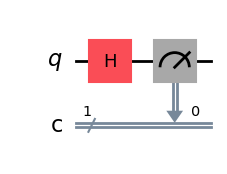

In [13]:
from qiskit.visualization import plot_circuit_layout
qc.draw('mpl')

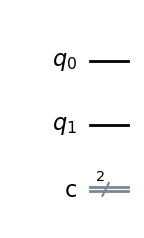

In [14]:
# Multiple Qubits
qc= QuantumCircuit(2, 2)
qc.draw('mpl')

In [15]:
#CNOT gate (Entanglement starts here)
'''
Control qubit controls target qubit
if control = 1 target flips
'''
qc = QuantumCircuit(2, 2)

qc.h(0)        # Put qubit 0 in superposition
qc.cx(0, 1)    # CNOT (control=0, target=1)

qc.measure([0,1], [0,1])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1000)

print(job.result().get_counts())



{'11': 515, '00': 485}


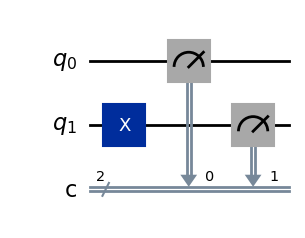

In [20]:
from qiskit import QuantumCircuit
qc= QuantumCircuit(2, 2)
qc.x(1)
qc.measure([0,1],[0,1])
qc.draw('mpl')

In [21]:
print(qc.draw('text'))

          ┌─┐   
q_0: ─────┤M├───
     ┌───┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 
